In [238]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import tensorflow as tf 

In [239]:
data=pd.read_csv("housing.csv")

In [240]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [242]:
data.dropna(inplace=True)

In [243]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [244]:


from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [245]:
x=x.join(pd.get_dummies(x.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [246]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,True,False,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,True,False,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,True,False,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,True,False,False,False,False


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [248]:
print(x_train.shape)

print(x_test.shape)

(16346, 13)
(4087, 13)


In [249]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,median_house_value
18679,-121.89,36.89,18,2774,492.0,1283,353,5.3680,False,False,False,False,True,352000
17401,-120.44,34.93,16,2098,558.0,1252,492,2.1509,False,False,True,False,False,67500
15904,-122.41,37.74,48,409,86.0,148,70,3.6687,False,False,False,True,False,335000
11531,-118.09,33.76,26,1625,440.0,533,414,1.8080,False,False,True,False,False,58500
13727,-117.19,34.06,21,6107,1559.0,2805,1444,2.5643,True,False,False,False,False,102700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,-121.76,36.83,28,1445,268.0,1017,284,3.6693,False,False,True,False,False,211000
10729,-117.87,33.60,20,3212,572.0,1064,526,6.6155,False,False,True,False,False,500001
17679,-121.84,37.32,22,3015,581.0,2491,530,4.3419,False,False,True,False,False,176300
14134,-117.07,32.75,14,3073,851.0,2000,782,2.3824,False,False,False,False,True,144700


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

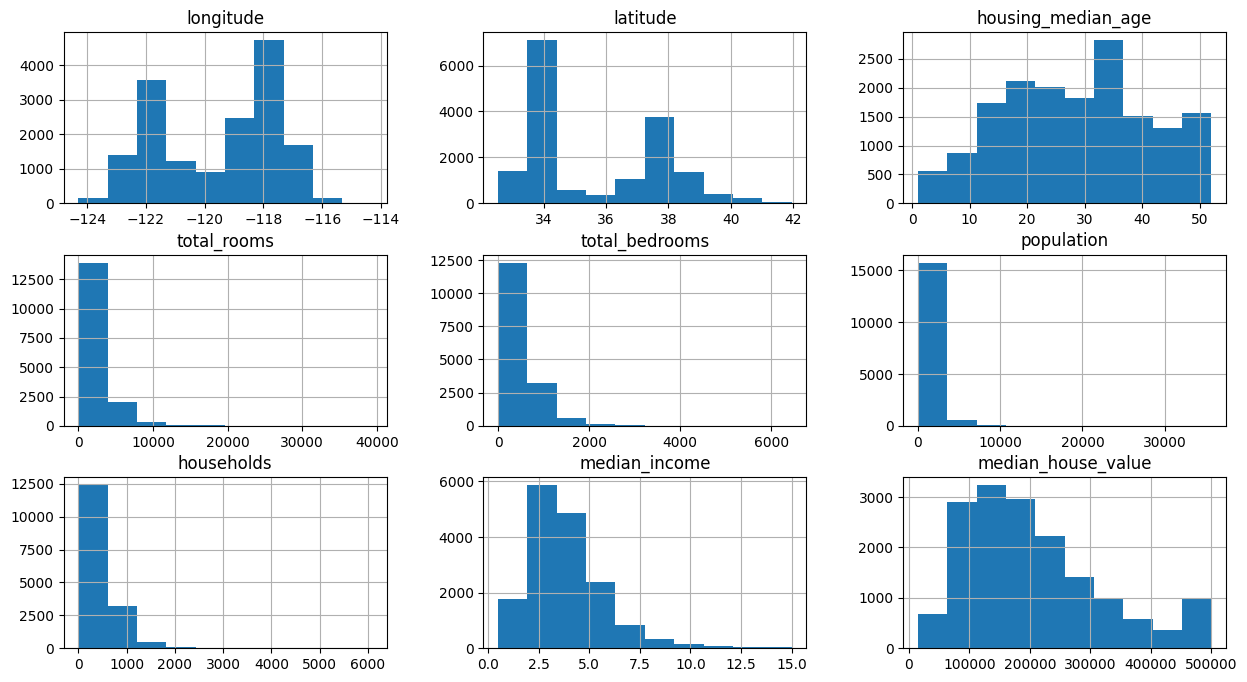

In [250]:
train_data.hist(figsize=(15,8))

In [251]:
train_data['households']=np.log(train_data['households']+1)
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

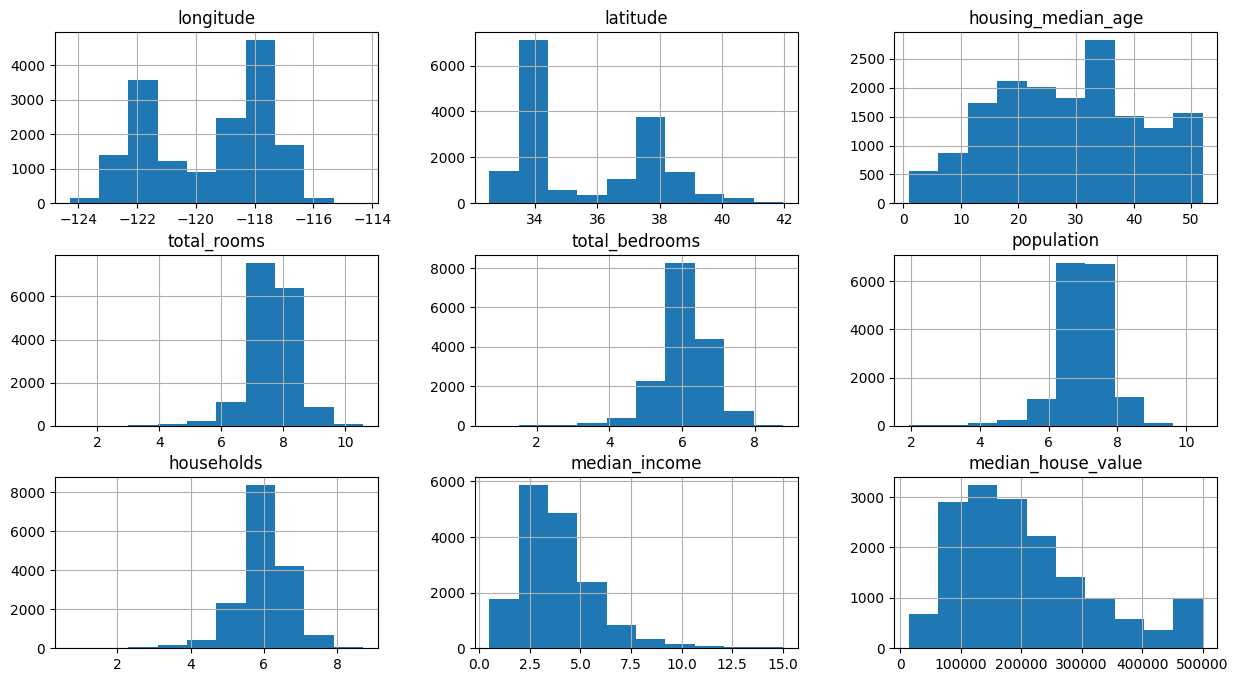

In [252]:
train_data.hist(figsize=(15,8))

<Axes: >

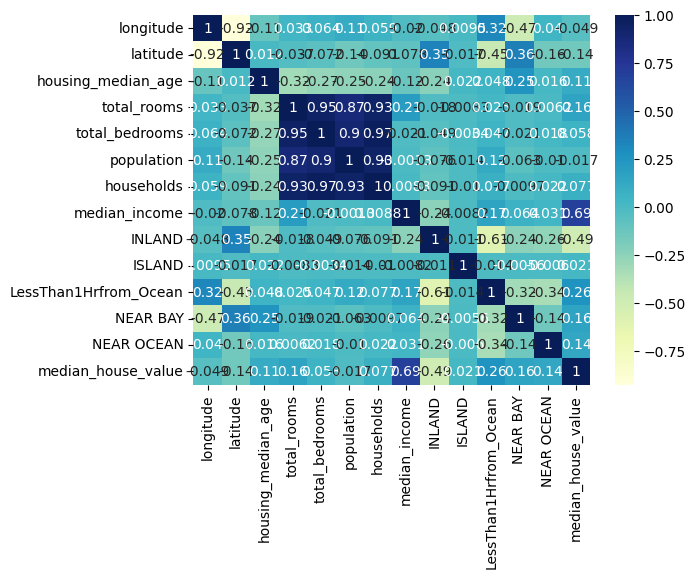

In [253]:
plt.Figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

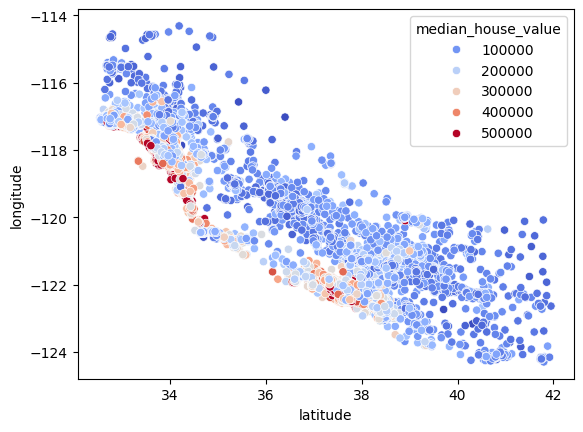

In [254]:
plt.Figure(figsize=(15,8))
sns.scatterplot(x= "latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [255]:
## feature engineering -->

x_train['bedroom_ratio']=x_train['total_bedrooms']/x_train['total_rooms']
x_train['houshold_ratio']=x_train['households']/x_train['total_rooms']


## feature engineering -->
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['houshold_ratio']=train_data['households']/train_data['total_rooms']



In [256]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,bedroom_ratio,houshold_ratio
18679,-121.89,36.89,18,2774,492.0,1283,353,5.3680,False,False,False,False,True,0.177361,0.127253
17401,-120.44,34.93,16,2098,558.0,1252,492,2.1509,False,False,True,False,False,0.265968,0.234509
15904,-122.41,37.74,48,409,86.0,148,70,3.6687,False,False,False,True,False,0.210269,0.171149
11531,-118.09,33.76,26,1625,440.0,533,414,1.8080,False,False,True,False,False,0.270769,0.254769
13727,-117.19,34.06,21,6107,1559.0,2805,1444,2.5643,True,False,False,False,False,0.255281,0.236450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,-121.76,36.83,28,1445,268.0,1017,284,3.6693,False,False,True,False,False,0.185467,0.196540
10729,-117.87,33.60,20,3212,572.0,1064,526,6.6155,False,False,True,False,False,0.178082,0.163761
17679,-121.84,37.32,22,3015,581.0,2491,530,4.3419,False,False,True,False,False,0.192703,0.175788
14134,-117.07,32.75,14,3073,851.0,2000,782,2.3824,False,False,False,False,True,0.276928,0.254474


In [257]:
## making the test data of the same format 

test_data=x_test.join(y_test)

test_data['households']=np.log(test_data['households']+1)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)



## feature engineering -->

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['houshold_ratio']=test_data['households']/test_data['total_rooms']

test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,LessThan1Hrfrom_Ocean,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,houshold_ratio
175,-122.24,37.80,52,7.372746,5.924256,7.020191,5.852202,2.1563,False,False,False,True,False,128600,0.803534,0.793762
8064,-118.19,33.83,42,7.480992,5.888878,6.704414,5.703782,4.9000,False,False,False,False,True,406300,0.787179,0.762437
15901,-122.41,37.74,34,7.247081,5.572154,6.733402,5.545177,4.7031,False,False,False,True,False,255200,0.768883,0.765160
11882,-117.37,33.98,43,7.959625,6.650279,7.538495,6.516193,2.1151,True,False,False,False,False,96700,0.835502,0.818656
7973,-118.21,33.88,32,7.318540,5.940171,6.987490,5.860786,3.2250,False,False,True,False,False,138200,0.811661,0.800814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,-117.93,33.87,29,7.108244,5.918894,7.508239,5.789960,1.7935,False,False,True,False,False,162500,0.832680,0.814542
2146,-119.77,36.77,38,8.028129,6.490724,7.273786,6.439350,2.0564,True,False,False,False,False,64700,0.808498,0.802099
19528,-120.97,37.64,42,7.766417,6.224558,7.031741,6.175867,2.0833,True,False,False,False,False,95500,0.801471,0.795202
9077,-118.14,34.69,34,7.272398,5.793014,6.563856,5.700444,3.2699,True,False,False,False,False,100000,0.796575,0.783846


In [258]:
## extracitng x and y test values 

x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [259]:
type(x_train)


pandas.core.frame.DataFrame

In [260]:
## now this data needs to be converted in numpy array to run accordingly 
x_train_num=x_train.to_numpy(dtype='float')
y_train_num=y_train.to_numpy(dtype='float')
x_test_num=x_test.to_numpy(dtype='float')
y_test_num=y_test.to_numpy(dtype='float')          

In [261]:
type(y_test_num)

numpy.ndarray

In [262]:
y_test_num.shape[0]

4087

## Function to check rmse error 

In [263]:
def RMSE_error(y_prediction,y_true):
    rmse=0;
    m=y_true.shape[0]
    for i in range(m):
        rmse+=(y_true[i]-y_prediction[i])**2
    rmse=np.sqrt(rmse/m)

    return rmse

from sklearn.metrics import mean_squared_error

## Prediction Model using Gradient Descent Algorithm by Numpy

In [264]:
def predict(x,w,b):
    f_wb=np.dot(x,w)+b
    return f_wb

def compute_m_cost(x,y,w,b):
    cost_sum=0
    m=x.shape[0]
    for i in range(m):
        f_wb_i=np.dot(x,w)+b
        cost=(y[i]-f_wb_i[i])**2
        cost_sum=cost_sum+cost 
    cost_sum=cost_sum/(2*m)
    return cost_sum


def compute_gradient_m(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
        dj_db=err+dj_db  
    dj_db/=m
    dj_dw/=m
    return dj_dw,dj_db

import copy, math
def gradient_decent_m(x,y,w_in,b_in,alpha,num_iterations,compute_gradient_m,compute_m_cost):

    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iterations):
        dj_dw,dj_db=compute_gradient_m(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
       
    return w,b

inti_w=np.zeros(15)
inti_b=0
iterations=1
alpha=0.00001
w_final,b_final=gradient_decent_m(x_train_num,y_train_num,inti_w,inti_b,alpha,iterations,compute_gradient_m,compute_m_cost)
print(w_final)
print(b_final)




[-2.47661952e+02  7.34340271e+01  6.10398977e+01  5.79823702e+03
  1.13862565e+03  2.91750542e+03  1.06374987e+03  9.52679466e+00
  3.95504721e-01  8.88413067e-04  1.06158945e+00  2.90965108e-01
  3.21204125e-01  4.23303059e-01  3.98793455e-01]
2.070151819405359


## prediction by using Gradient Descent algorithm and RMS error

In [265]:
predictions=predict(x_test_num,w_final,b_final)

error_by_Gradient_descent=np.sqrt(mean_squared_error(predictions,y_test_num))
print("The Rmse Error by Gradient Descent Algo: ",error_by_Gradient_descent)


The Rmse Error by Gradient Descent Algo:  148094.09197370202


## Prediction Model Using COnvolutional Neural Network by Tensorflow & Keras

In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [267]:
## normalising the data

norm_data=tf.keras.layers.Normalization(axis=-1)

norm_data.adapt(x_train_num)
x_train_num_normalised=norm_data(x_train_num)

In [268]:
## model creation 
model = Sequential(
    [
        tf.keras.Input(shape=(15,)),
        Dense(128, activation='relu'),
        Dense(25, activation='relu'),
        
        Dense(1, activation='linear'),

     ]
)


In [269]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2048      
                                                                 
 dense_10 (Dense)            (None, 25)                3225      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 5299 (20.70 KB)
Trainable params: 5299 (20.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [270]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

model.fit(x_train_num_normalised,y_train_num,epochs=60)

Epoch 1/60


511/511 [==============================] - 1s 1ms/step - loss: 21771079680.0000 - rmse: 147550.2656
Epoch 2/60
511/511 [==============================] - 1s 1ms/step - loss: 5609704960.0000 - rmse: 74897.9609
Epoch 3/60
511/511 [==============================] - 1s 1ms/step - loss: 4753293312.0000 - rmse: 68944.1328
Epoch 4/60
511/511 [==============================] - 1s 1ms/step - loss: 4511721984.0000 - rmse: 67169.3516
Epoch 5/60
511/511 [==============================] - 1s 1ms/step - loss: 4397383680.0000 - rmse: 66312.7734
Epoch 6/60
511/511 [==============================] - 1s 1ms/step - loss: 4327847936.0000 - rmse: 65786.3828
Epoch 7/60
511/511 [==============================] - 1s 1ms/step - loss: 4279134464.0000 - rmse: 65415.0938
Epoch 8/60
511/511 [==============================] - 1s 1ms/step - loss: 4245671424.0000 - rmse: 65158.8164
Epoch 9/60
511/511 [==============================] - 1s 1ms/step - loss: 4206130432.0000 - rmse: 64854.6875
Epoch 10/60
511/511 [=======

Prediction Using the Neural Network 

In [271]:
x_test_normalised= norm_data(x_test_num)
predictions_nn=model.predict(x_test_normalised)

## rmse error by this method :- 
rmse_error_by_neuralnetwork=np.sqrt(mean_squared_error(predictions_nn,y_test))
print(RMSE_error(predictions_nn,y_test_num))

128/128 [==============================] - 0s 867us/step
[98015.65]


## Prediction Using Skit learn (Linear Regressor Model)

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [273]:
## data rescaling :- 
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

x_train_scaled=scaler.fit_transform(x_train)

## model fitting 
reg=LinearRegression()
reg.fit(x_train,y_train)

## running on test cases :-

x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

x_test_scaled=scaler.transform(x_test)

reg.score(x_test,y_test)



0.6663561460894155

RMSE by skit-Learn Method (Linear Regression)

In [274]:
predictions_lr=reg.predict(x_test)
rmse_error_by_skit_lr=np.sqrt(mean_squared_error(predictions_lr,y_test))
print("The Rmse Error by =linearRegression Algo: ",rmse_error_by_skit_lr)

The Rmse Error by =linearRegression Algo:  66282.96344091477


## Prediction by random forest algorithm :) 

In [275]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

rmse error by random forest algorithm

In [276]:
prediction_randomforest=forest.predict(x_test)
forest.score(x_test,y_test)

0.813998818774891

In [277]:
rmse_error_by_randomforest=np.sqrt(mean_squared_error(prediction_randomforest,y_test))
print("The Rmse Error by Random Forest Algo: ",rmse_error_by_randomforest)

The Rmse Error by Random Forest Algo:  49490.08544502078


In [280]:

print("********************** The Final Result **************************** ")
print("The Rmse Error by Gradient Descent Algo: ",error_by_Gradient_descent)
print("\n")
print("The Rmse Error by Neural Network : ",rmse_error_by_neuralnetwork)
print('\n')
print("The Rmse Error by Skit-Learn LinearRegression Algo: ",rmse_error_by_skit_lr)
print('\n')
print("The Rmse Error by Skit-Learn Random Forest Algo: ",rmse_error_by_randomforest)


********************** The Final Result **************************** 
The Rmse Error by Gradient Descent Algo:  148094.09197370202


The Rmse Error by Neural Network :  98015.67863282804


The Rmse Error by Skit-Learn LinearRegression Algo:  66282.96344091477


The Rmse Error by Skit-Learn Random Forest Algo:  49490.08544502078
